#
y값에 영향없는 x 변수 삭제 -> 표준화-> PCA 적용

In [11]:
import pandas as pd
import numpy as np

In [12]:
rdf= pd.read_csv("team2.csv",encoding='utf-8',index_col=0)

In [13]:
rdf.index=range(0,19) # index 이름을 바꿔줬다 
rdf

,출생아수,졸업자수,사교육비,인구,직장가입자,지역가입자,사회단체참여율,수출,수입,실질국내총생산(GDP),...,노년부양비,노령화지수,사망자수,실업률,1인가구 비율,혼인건수(건),주택매매가격동향,\t맞벌이가구비율,유치원수,어린이집수
0,640089,558932.0,200400.0,47008111.0,75391264.0,27525025.0,44.8,172267511.0,160481015.0,947394.8,...,10.1,34.3,248740.0,4.4,15.5,326104.0,1.9,42.3,19276,8494
1,559934,558932.0,200400.0,47370164.0,75391264.0,27525025.0,44.8,150439144.0,141097821.0,947394.8,...,10.5,36.2,243813.0,4.0,15.5,326104.0,1.9,42.1,20097,8407
2,496911,558932.0,200400.0,47644736.0,75391264.0,27525025.0,44.8,162470528.0,152126153.0,1020582.4,...,11.0,38.6,247524.0,3.3,15.5,326104.0,1.9,42.0,22147,8343
3,495036,558932.0,200400.0,47892330.0,75391264.0,27525025.0,44.8,193817443.0,178826657.0,1052703.1,...,11.5,41.1,246463.0,3.6,15.5,326104.0,1.9,42.0,24142,8292
4,476958,558932.0,200400.0,48082519.0,75391264.0,27525025.0,38.8,253844672.0,224462687.0,1107416.2,...,12.0,43.8,246220.0,3.7,15.5,326104.0,1.9,42.2,26903,8246
5,438707,558932.0,200400.0,48184561.0,75391264.0,27525025.0,38.8,284418743.0,261238264.0,1155129.7,...,12.5,46.8,245874.0,3.7,20.0,326104.0,1.9,42.6,28367,8275
6,451759,558932.0,200400.0,48438292.0,75391264.0,27525025.0,38.8,325464848.0,309382632.0,1215939.5,...,13.0,50.4,244162.0,3.5,20.0,326104.0,1.9,42.6,29233,8290
7,496822,558932.0,200400.0,48683638.0,75391264.0,27525025.0,39.8,371489086.0,356845733.0,1286458.5,...,13.5,54.6,246482.0,3.2,20.0,326104.0,1.9,43.0,30856,8294
8,465892,558932.0,209095.0,49054708.0,75391264.0,27525025.0,39.8,422007328.0,435274737.0,1325219.3,...,14.0,58.8,246113.0,3.2,20.0,326104.0,1.9,43.2,33499,8344
9,444849,558932.0,216259.0,49307835.0,75391264.0,27525025.0,39.8,363533561.0,323084521.0,1335724.3,...,14.4,62.9,246942.0,3.6,20.0,326104.0,1.9,43.0,35550,8373


In [14]:
Y=rdf.iloc[:,:1]
X=rdf.iloc[:,1:]

In [15]:
from sklearn.preprocessing import minmax_scale
minmax_X = minmax_scale(X)
minmax_Y = minmax_scale(Y)
rdf.iloc[:,1:]=minmax_X
rdf.iloc[:,:1]=minmax_Y

In [16]:
rdf.shape

(19, 32)

In [17]:
del rdf['사교육비']
del rdf['사회단체참여율']
del rdf['원자료']
del rdf['다문화출생아수']
del rdf['전국 이혼건수 ']
del rdf['실업률']
del rdf['주택매매가격동향']

In [18]:
rdf.shape

(19, 25)

In [19]:
rdf

,출생아수,졸업자수,인구,직장가입자,지역가입자,수출,수입,실질국내총생산(GDP),1인당주거면적,고등교육이수율,...,신문 (%),유소년부양비,노년부양비,노령화지수,사망자수,1인가구 비율,혼인건수(건),\t맞벌이가구비율,유치원수,어린이집수
0,1.000000,0.148319,0.000000,0.000000,0.000000,0.048036,0.049183,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.089570,0.000000,0.958259,0.069767,0.000000,0.316731
1,0.744132,0.148319,0.078732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011952,...,1.000000,0.966387,0.042105,0.024485,0.000000,0.000000,0.958259,0.023256,0.033518,0.205619
2,0.542952,0.148319,0.138441,0.000000,0.000000,0.026476,0.027983,0.085068,0.000000,0.083665,...,1.000000,0.924370,0.094737,0.055412,0.067464,0.000000,0.958259,0.000000,0.117212,0.123883
3,0.536967,0.148319,0.192283,0.000000,0.000000,0.095458,0.095733,0.122403,0.000000,0.223108,...,1.000000,0.873950,0.147368,0.087629,0.048176,0.000000,0.958259,0.000000,0.198661,0.058748
4,0.479259,0.148319,0.233642,0.000000,0.000000,0.227555,0.211530,0.185998,0.000000,0.262948,...,1.000000,0.823529,0.200000,0.122423,0.043758,0.000000,0.958259,0.046512,0.311382,0.000000
5,0.357155,0.148319,0.255832,0.000000,0.000000,0.294836,0.304844,0.241456,0.000000,0.306773,...,1.000000,0.764706,0.252632,0.161082,0.037468,0.328467,0.958259,0.139535,0.371152,0.037037
6,0.398820,0.148319,0.311009,0.000000,0.000000,0.385162,0.427005,0.312137,0.000000,0.358566,...,1.000000,0.689076,0.305263,0.207474,0.006345,0.328467,0.958259,0.139535,0.406508,0.056194
7,0.542668,0.148319,0.364362,0.000000,0.000000,0.486444,0.547438,0.394104,0.219178,0.426295,...,1.000000,0.613445,0.357895,0.261598,0.048521,0.328467,0.958259,0.232558,0.472769,0.061303
8,0.443934,0.148319,0.445055,0.000000,0.000000,0.597614,0.746444,0.439157,0.219178,0.505976,...,1.000000,0.529412,0.410526,0.315722,0.041813,0.328467,0.958259,0.279070,0.580673,0.125160
9,0.376762,0.148319,0.500101,0.000000,0.000000,0.468937,0.461773,0.451367,0.315068,0.589641,...,1.000000,0.453782,0.452632,0.368557,0.056884,0.328467,0.958259,0.232558,0.664408,0.162197


In [20]:
rdf.columns

Index(['출생아수', '졸업자수', '인구', '직장가입자', '지역가입자', '수출', '수입', '실질국내총생산(GDP)',
       '1인당주거면적', '고등교육이수율', 'e러닝시장규모', '문화여가지출률', '지니계수', 'TV (%)', '라디오 (%)',
       '신문 (%)', '유소년부양비', '노년부양비', '노령화지수', '사망자수', '1인가구 비율', '혼인건수(건)',
       '\t맞벌이가구비율', '유치원수', '어린이집수'],
      dtype='object')

In [21]:
rdf

,출생아수,졸업자수,인구,직장가입자,지역가입자,수출,수입,실질국내총생산(GDP),1인당주거면적,고등교육이수율,...,신문 (%),유소년부양비,노년부양비,노령화지수,사망자수,1인가구 비율,혼인건수(건),\t맞벌이가구비율,유치원수,어린이집수
0,1.000000,0.148319,0.000000,0.000000,0.000000,0.048036,0.049183,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.089570,0.000000,0.958259,0.069767,0.000000,0.316731
1,0.744132,0.148319,0.078732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011952,...,1.000000,0.966387,0.042105,0.024485,0.000000,0.000000,0.958259,0.023256,0.033518,0.205619
2,0.542952,0.148319,0.138441,0.000000,0.000000,0.026476,0.027983,0.085068,0.000000,0.083665,...,1.000000,0.924370,0.094737,0.055412,0.067464,0.000000,0.958259,0.000000,0.117212,0.123883
3,0.536967,0.148319,0.192283,0.000000,0.000000,0.095458,0.095733,0.122403,0.000000,0.223108,...,1.000000,0.873950,0.147368,0.087629,0.048176,0.000000,0.958259,0.000000,0.198661,0.058748
4,0.479259,0.148319,0.233642,0.000000,0.000000,0.227555,0.211530,0.185998,0.000000,0.262948,...,1.000000,0.823529,0.200000,0.122423,0.043758,0.000000,0.958259,0.046512,0.311382,0.000000
5,0.357155,0.148319,0.255832,0.000000,0.000000,0.294836,0.304844,0.241456,0.000000,0.306773,...,1.000000,0.764706,0.252632,0.161082,0.037468,0.328467,0.958259,0.139535,0.371152,0.037037
6,0.398820,0.148319,0.311009,0.000000,0.000000,0.385162,0.427005,0.312137,0.000000,0.358566,...,1.000000,0.689076,0.305263,0.207474,0.006345,0.328467,0.958259,0.139535,0.406508,0.056194
7,0.542668,0.148319,0.364362,0.000000,0.000000,0.486444,0.547438,0.394104,0.219178,0.426295,...,1.000000,0.613445,0.357895,0.261598,0.048521,0.328467,0.958259,0.232558,0.472769,0.061303
8,0.443934,0.148319,0.445055,0.000000,0.000000,0.597614,0.746444,0.439157,0.219178,0.505976,...,1.000000,0.529412,0.410526,0.315722,0.041813,0.328467,0.958259,0.279070,0.580673,0.125160
9,0.376762,0.148319,0.500101,0.000000,0.000000,0.468937,0.461773,0.451367,0.315068,0.589641,...,1.000000,0.453782,0.452632,0.368557,0.056884,0.328467,0.958259,0.232558,0.664408,0.162197


In [22]:
##pca 적용  
#   https://ssungkang.tistory.com/entry/인공지능-PCA-2-python-을-사용한-PCA-실습

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components = 16)       # pca 로 차원 축소 

In [25]:
principalComponents = pca.fit_transform(X)

In [26]:
principalDf = pd.DataFrame(data = principalComponents                    # 차원축소한것을 dataframe 에 넣었다 
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                         'principal component 4','principal component 5','principal component 6',
                         'principal component 7','principal component 8','principal component 9','principal component 10',
                        'principal component 11','principal component 12','principal component 13','principal component 14' ,
                         'principal component 15','principal component 16'])

In [27]:
principalDffinalDataFrame = pd.concat([rdf[['출생아수']],principalDf], axis=1)    # 기존에 있던 y값 출생아수와 합쳐줍니다.

In [28]:
principalDffinalDataFrame

,출생아수,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16
0,1.000000,3.075030e+08,-1.607389e+07,6.454191e+06,7.968402e+04,458073.071078,-150605.481809,5755.844348,169.257870,-293.985715,285.729166,3082.424033,-984.372810,-829.320471,-471.460459,3.921410,-0.453683
1,0.744132,3.361744e+08,-2.103471e+07,8.767324e+06,2.586088e+05,-58458.904755,-73496.604090,-23414.868367,3640.614272,4222.230218,-1114.038958,-2113.359262,676.068108,95.785801,762.545182,-13.975961,-5.601358
2,0.542952,3.201439e+08,-1.815584e+07,7.694211e+06,2.494988e+05,-228612.434040,27727.786826,12092.367418,-533.156317,-328.249053,-2582.015847,2913.253111,513.171607,-144.692032,584.786614,-0.242145,10.216296
3,0.536967,2.797038e+08,-1.153679e+07,3.652932e+06,3.533464e+04,-199112.924585,155253.910094,2322.072606,11377.074682,-5566.807432,5284.767266,-13.481549,-1103.201670,-764.517804,-299.115709,-0.496711,-2.884550
4,0.479259,2.058403e+08,-1.259261e+06,-7.478923e+06,-7.095673e+05,107103.037707,108077.829239,-5907.862385,6374.646336,5287.802837,-1813.479063,-323.705851,663.495281,1377.103353,-567.715746,-0.916051,1.067593
5,0.357155,1.594112e+08,9.882699e+06,-4.784392e+06,-2.865100e+05,126852.800714,5238.342425,4961.469336,-1701.971952,697.051369,-603.988181,-1879.994479,753.780295,784.009930,-703.344145,16.636511,-5.106585
6,0.398820,9.787792e+07,2.430456e+07,-1.927123e+06,2.152931e+05,78671.578709,-14523.138971,9018.120833,-6225.997685,-1348.683356,621.181849,-4014.455551,192.403698,214.026507,464.610684,15.066785,8.629252
7,0.542668,3.312625e+07,3.762978e+07,-2.752605e+06,3.831362e+05,130677.869843,15714.963683,23598.757024,-8028.179193,-3646.911720,2221.927091,-2398.730479,221.864460,105.230538,735.592192,-11.109246,-7.886857
8,0.443934,-5.508756e+07,6.375128e+07,1.261754e+07,2.127858e+06,-127407.182450,10369.106892,-9504.411433,-7892.581719,4910.815970,-53.673898,855.839537,-1052.570805,401.113885,-599.354258,-7.947675,2.133655
9,0.376762,6.094782e+07,2.415555e+07,-1.843125e+07,-1.000960e+06,-405940.715796,-104565.685747,-16117.080237,-3289.063183,-7349.859750,-3095.208670,-443.877497,-785.522466,-6.030148,-100.878132,6.489448,-1.465075


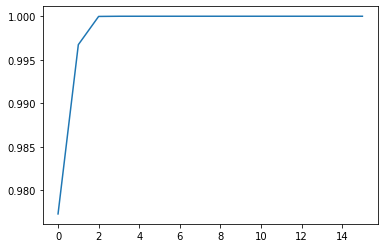

In [29]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_)) # 차원축소) 32개중 16개로 줄였을때,  4차원까지 더 줄였을땐 설명력이 괜찮음(98%이상) 
                                                   # 4개이하로 줄이면 설명력이 낮아짐 -> 우리는 그냥 16차원으로 줄여놓고 해보자 

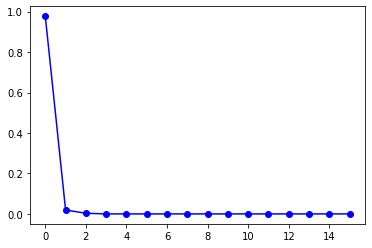

In [30]:
  
#16개로 축소했다-> 변수16개인데, 4 이후로부터는 수평 -> 영향이 없는변수다 -> 즉4번변수까지만 쓰는 것이 좋다(principal component 4까지만 쓰는것이 좋다 ) -> principal component 5~16 는 버리자  
plt.plot(pca.explained_variance_ratio_, 'bo-')

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import make_regression
import statsmodels.api as sm
import xgboost as xgb

In [32]:
### principal1~principal4 까지 와 y를 가지고 dataframe 을 만들자 


In [33]:
DF=principalDffinalDataFrame.iloc[:,:5]

In [34]:
# 종속변수와 독립변수 지정
DF_Y=DF.iloc[:,:1]
DF_X=DF.iloc[:,1:]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(DF_X,DF_Y.iloc[:,:1], random_state=0)


In [36]:
# SVR 모델 적용
model = svm.SVR(gamma='scale')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# svr 모델 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE",mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))


df1=pd.DataFrame({'y_data':y_test['출생아수'],'preds':y_pred})
df1.corr()

MSE 0.028452992554258406
RMSE 0.1686801486668138
0.503442014111207


,y_data,preds
y_data,1.000000,0.872591
preds,0.872591,1.000000


In [38]:

# 과소인지 과대인지 확인해보자 ( )
print()
print(model)
X_pred=model.predict(X_train)
print('MSE', mean_squared_error(y_train, X_pred))
y_pred = model.predict(X_test)
print("MSE",mean_squared_error(y_test, y_pred))  # mse를 비교했을때 test>train : 과소적합 
 ### 결과를 확인했을때 약간 과대적합이다 


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE 0.016773336610489634
MSE 0.028452992554258406


In [39]:
#최적의 모델은 svr 으로 결론을 냈다
# gridsearchcv 를 해보자 
model.get_params
# coef, tol, epsilon,
#c, cache_size, ,  max_iter,shrinking, verbose 

<bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
svr = svm.SVR()
svr_param_grid = { 'kernel' : ['linear'],
                  'gamma':['scale']}

GSrf= GridSearchCV(svr, svr_param_grid, cv=3,verbose=1)


In [42]:
#GSrf.fit(X_train, y_train)
    

C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in ver

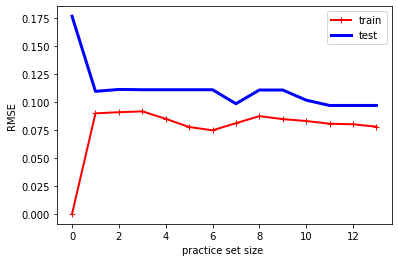

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = model.predict(X_train[:m])
        Y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m], Y_train_predict))
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))#이 함수는 말그대로 평균 제곱 오차 회귀 손실이다.
    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    plt.legend(loc='upper right')
    plt.xlabel('practice set size ')
    plt.ylabel('RMSE')
    plt.show()

svr_reg = svm.SVR()
plot_learning_curves(svr_reg, DF_X, DF_Y)

In [ ]:
# bestscore / param/ best estimator 

In [ ]:
#svr, gridsearchcv 하기, cv도 해보기 , train test 갯수 조정하기 